In [4]:
# Import des librairies
%matplotlib inline
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats import gaussian_kde
from numpy import linalg
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR, LinearSVC
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier

# Bagging

## Question 1

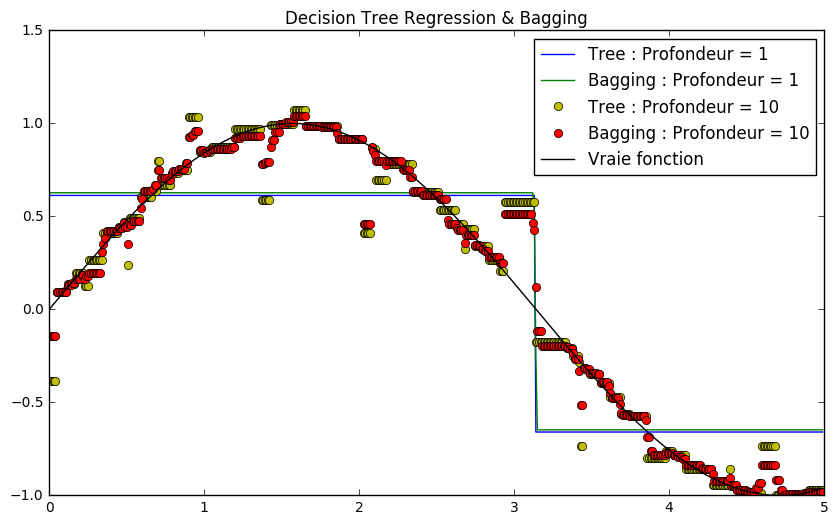

In [133]:
# Génération des données X/Y
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))

# Défintion des paramètres des modèles
n_estimators = 10  # L in the text
tree_max_depth = 10
bagging_max_depth = 10

# Définition de deux classifieurs de type arbre
tree1 = DecisionTreeRegressor(max_depth=1)
tree1.fit(X, y)

tree10 = DecisionTreeRegressor(max_depth=10)
tree10.fit(X, y)

# Définition de deux classifieurs de type bagging + arbre
bagging1 = BaggingRegressor(tree1, n_estimators=n_estimators)
bagging1.fit(X, y)

bagging10 = BaggingRegressor(tree10, n_estimators=n_estimators)
bagging10.fit(X, y)

# Prediction en fonction des différents classifieurs définis précédemment
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree1 = tree1.predict(X_test)
y_tree10 = tree10.predict(X_test)
y_bagging1 = bagging1.predict(X_test)
y_bagging10 = bagging10.predict(X_test)

# Affichage du résultat
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_tree1, '-', c="b", label="Tree : Profondeur = 1")
plt.plot(X_test, y_bagging1, '-', c="g", label="Bagging : Profondeur = 1")
plt.plot(X_test, y_tree10, 'o', c="y", label="Tree : Profondeur = 10")
plt.plot(X_test, y_bagging10, 'o', c="r", label="Bagging : Profondeur = 10")
plt.plot(X_test, np.sin(X_test).ravel(), c="k", label="Vraie fonction")
plt.title("Decision Tree Regression & Bagging")
plt.legend(loc=1, numpoints=1)
plt.show()

## Question 2

#### Bagging : Influence de L

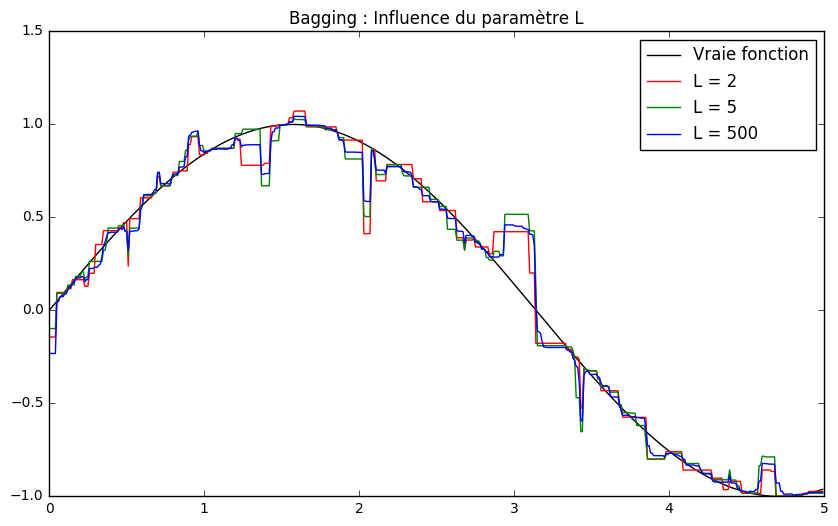

In [134]:
# Role de L
l_grid = [2, 5, 500]

plt.figure(figsize=(10, 6))
plt.title("Bagging : Influence du paramètre L")
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'm', 'k'])))
plt.plot(X_test, np.sin(X_test).ravel(), c="k", label="Vraie fonction")

for l in l_grid:
    bagging = BaggingRegressor(tree10, n_estimators=l)
    bagging.fit(X, y)
    y_bagging = bagging.predict(X_test)
    plt.plot(X_test, y_bagging, '-', label="L = %d" % l)
plt.legend(loc=1, numpoints=1)
plt.show()

#### Conclusion : Influence de L
Plus le nombre d'estimateurs augmente plus la variance augmente mais le biais semble dinimuer

#### Bagging Tree : Influence de la profondeur

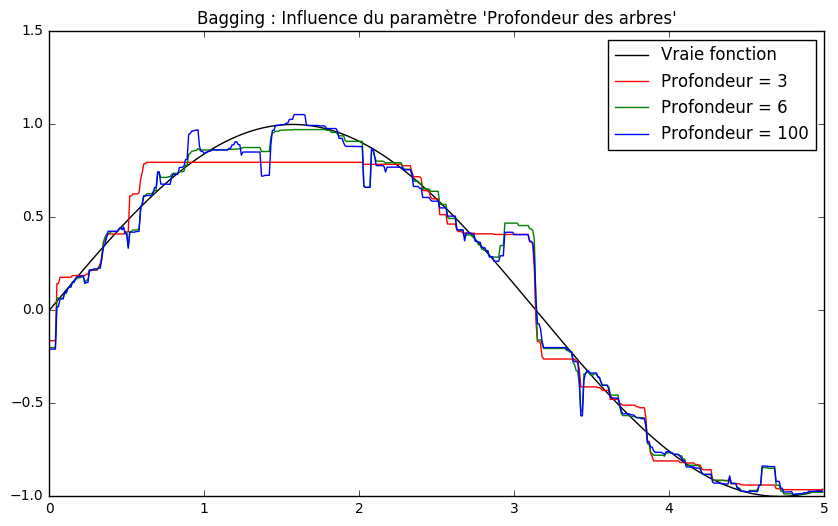

In [135]:
# Role de la profondeur
d_grid = [3, 6, 100]

plt.figure(figsize=(10, 6))
plt.title("Bagging : Influence du paramètre 'Profondeur des arbres'")
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'm', 'k'])))
plt.plot(X_test, np.sin(X_test).ravel(), c="k", label="Vraie fonction")

for d in d_grid:
    tree = DecisionTreeRegressor(max_depth=d)
    bagging = BaggingRegressor(tree, n_estimators=50)
    bagging.fit(X, y)
    y_bagging = bagging.predict(X_test)
    plt.plot(X_test, y_bagging, '-', label="Profondeur = %d" % d)
plt.legend(loc=1, numpoints=1)
plt.show()

#### Conclusion : Influence de la profondeur
Plus la profondeur augmente plus la variance augmente mais le biais diminue

## Question 3
##### Analyse du biais des arbres de décision

In [105]:
# Calcul de la moyenne de l'erreur lorsque l'on augmente la profondeur des arbres
print("### Calcul de la moyenne de l'erreur lorsque l'on augmente la profondeur des arbres ###")

d_grid = [3, 6, 10, 50]

for i, d in enumerate(d_grid):
    tree = DecisionTreeRegressor(max_depth=d)
    tree.fit(X, y)
    y_tree = tree.predict(X_test)
    print("La moyenne pour L = {0} est de : {1:.3f}".format(d, np.mean(y_tree)))

### Calcul de la moyenne de l'erreur lorsque l'on augmente la profondeur des arbres ###
La moyenne pour L = 3 est de : 0.137
La moyenne pour L = 6 est de : 0.155
La moyenne pour L = 10 est de : 0.149
La moyenne pour L = 50 est de : 0.149


La moyenne des erreurs n'est pas nulle on constate donc un léger biais.

##### Analyse du boosting sur la variance des arbres de décision

In [101]:
# Calcul de la variance lorsque l'on augmente le nombre d'estimateur
print("### Calcul de la variance lorsque l'on augmente le nombre d'estimateur ###")

l_grid = [3, 6, 50, 100, 500]

for i, l in enumerate(l_grid):
    bagging = BaggingRegressor(tree10, n_estimators=l)
    bagging.fit(X, y)
    y_bagging = bagging.predict(X_test)
    print("La variance pour L = {0} est de : {1:.3f}".format(l, np.var(y_bagging)))

# Calcul de la variance pour l'arbre de décision
print("\n### Calcul de la variance pour l'arbre de décision ###")
print("La variance pour l'arbre de décision sans bagging est de : {0:.3f}".format(np.var(y_tree10)))

### Calcul de la variance lorsque l'on augmente le nombre d'estimateur ###
La variance pour L = 3 est de : 0.491
La variance pour L = 6 est de : 0.483
La variance pour L = 50 est de : 0.491
La variance pour L = 100 est de : 0.488
La variance pour L = 500 est de : 0.488

### Calcul de la variance pour l'arbre de décision ###
La variance pour l'arbre de décision sans bagging est de : 0.505


On constate donc que le bagging diminue effectivement la variance des arbres de décisions

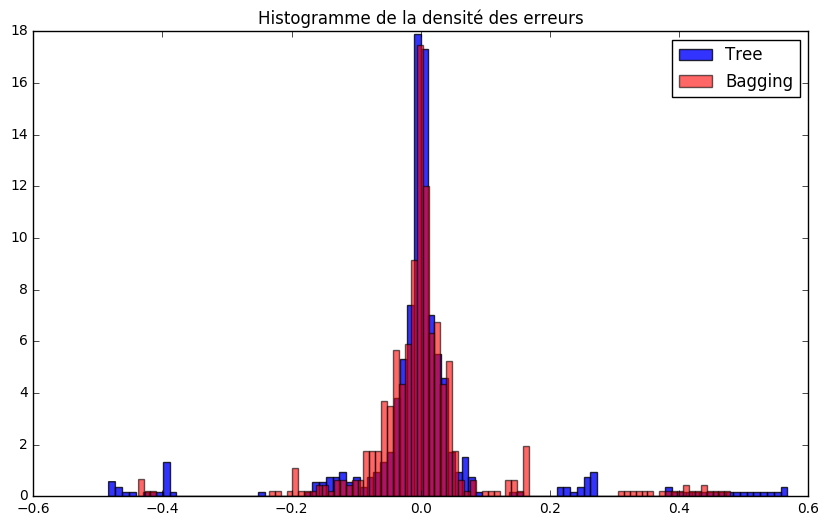

In [137]:
# Vérification graphique : Calcul de la densité de l'erreur pour les arbres et le bagging
error_tree = y_tree10 - np.sin(X_test).ravel()
error_bagging = y_bagging10 - np.sin(X_test).ravel()
plt.figure(figsize=(10, 6))
plt.hist(error_tree, bins=100, normed=True, color="blue", alpha=0.8, label="Tree")
plt.hist(error_bagging, bins=100, normed=True, color="red", alpha=0.6, label="Bagging")
plt.title("Histogramme de la densité des erreurs")
plt.legend(loc=1, numpoints=1)
plt.show()

Ce graphique de densité confirme bien l'intuition première, la courbe du bagging s'étendant moins que celle de l'arbre de décision

## Question 4

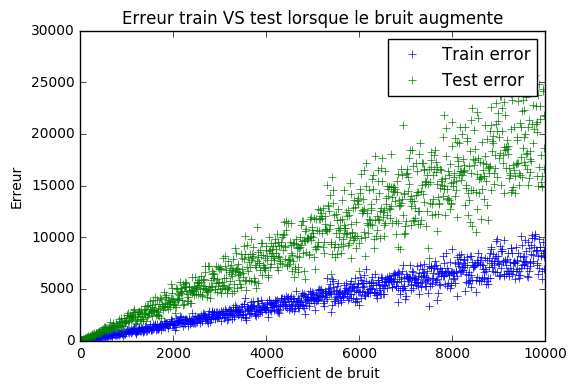

In [119]:
# Définition de la fonction qui génère un nouveau vecteur en fonction du bruit
def compute_noise(level):
    y = np.sin(X).ravel()
    y[::5] += level * (0.5 - rng.rand(16))
    return y

# Définition des variables principales
noise_grid = np.arange(0, 10000, 10)
error_train = [0] * len(noise_grid)
error_test = [0] * len(noise_grid)

# Pour chaque niveau de bruit calcule de l'erreur faite sur les données de train, et les données de test
for i, level in enumerate(noise_grid):
    tree = DecisionTreeRegressor(max_depth=10)
    bagging = BaggingRegressor(tree, n_estimators=10)
    y_noise = compute_noise(level)
    bagging.fit(X, y_noise)
    
    y_predict_train = bagging.predict(X)
    y_predict_test = bagging.predict(X_test)
    
    error_train[i] = linalg.norm(y_predict_train - np.sin(X).ravel())
    error_test[i] = linalg.norm(y_predict_test - np.sin(X_test).ravel())

    
# Affichage du résultat
plt.plot(noise_grid, error_train, '+', c="b", label="Train error")
plt.plot(noise_grid, error_test, '+', c="g", label="Test error")
plt.title("Erreur train VS test lorsque le bruit augmente")
plt.xlabel("Coefficient de bruit")
plt.ylabel("Erreur")
plt.legend(loc=1, numpoints=1)
plt.show()

On constate que plus le bruit augmente, plus l'écart entre l'erreur faite sur le test et celle faite sur le train augmente.
On peut donc conclure que le bagging avec des arbres a tendance à faire du surapprentissage

## Question 5

Nous allons calculer l'erreur que l'on fait sur le test via la méthode avec bootstrap, et via la méthode avec sous échantillonnage

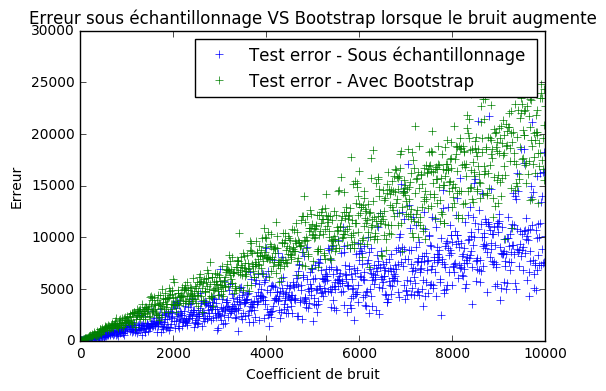

In [130]:
# Définition des variables principales
noise_grid = np.arange(0, 10000, 10)
error_test_no_boot = [0] * len(noise_grid)
error_test_boot = [0] * len(noise_grid)

# Pour chaque niveau de bruit calcule de l'erreur faite sur les données de train, et les données de test
for i, level in enumerate(noise_grid):
    tree = DecisionTreeRegressor(max_depth=10)
    bagging_no_boot = BaggingRegressor(tree, n_estimators=10, max_samples=0.1, bootstrap=False)
    bagging_boot = BaggingRegressor(tree, n_estimators=10)

    y_noise = compute_noise(level)
    bagging_no_boot.fit(X, y_noise)
    bagging_boot.fit(X, y_noise)

    y_predict_no_boot_test = bagging_no_boot.predict(X_test)
    y_predict_boot_test = bagging_boot.predict(X_test)
    
    error_test_no_boot[i] = linalg.norm(y_predict_no_boot_test - np.sin(X_test).ravel())
    error_test_boot[i] = linalg.norm(y_predict_boot_test - np.sin(X_test).ravel())

    
# Affichage du résultat
plt.plot(noise_grid, error_test_no_boot, '+', c="b", label="Test error - Sous échantillonnage ")
plt.plot(noise_grid, error_test_boot, '+', c="g", label="Test error - Avec Bootstrap")
plt.title("Erreur sous échantillonnage VS Bootstrap lorsque le bruit augmente")
plt.xlabel("Coefficient de bruit")
plt.ylabel("Erreur")
plt.legend(loc=1, numpoints=1)
plt.show()

On constate effectivement que lorsque l'on sous échantillonne, l'erreur sur le test est globalement plus faible que lorsque l'on utilise la méthode de bootstrap

# Random Forests

## Question 6

In [5]:
# Import des différents datasets
dict_datasets = {
    "boston" : ["reg", datasets.load_boston(return_X_y=True)[0],datasets.load_boston(return_X_y=True)[1]],
    "diabetes" : ["reg", datasets.load_diabetes(return_X_y=True)[0], datasets.load_diabetes(return_X_y=True)[1]],
    "iris" : ["class", datasets.load_iris(return_X_y=True)[0], datasets.load_iris(return_X_y=True)[1]],
    "digits" : ["class", datasets.load_digits(return_X_y=True)[0], datasets.load_digits(return_X_y=True)[1]]   
} 

In [217]:
# Définition des prédicteurs
rf_reg = RandomForestRegressor()
rf_class = RandomForestClassifier()

svm_reg = LinearSVR()
svm_class = LinearSVC()

# Calcul des scores pour les différents datasets
dict_scores_rf = {}
dict_scores_svm = {}

for key, value in dict_datasets.items():
    if value[0] == "reg":
        score_rf = cross_val_score(rf_reg, value[1], value[2] ,cv=7)
        score_svm = cross_val_score(svm_reg, value[1], value[2] ,cv=7)
        dict_scores_rf[key] = score_rf
        dict_scores_svm[key] = score_svm

    else:
        score_rf = cross_val_score(rf_class, value[1], value[2] ,cv=7)
        score_svm = cross_val_score(svm_class, value[1], value[2] ,cv=7)
        dict_scores_rf[key] = score_rf
        dict_scores_svm[key] = score_svm

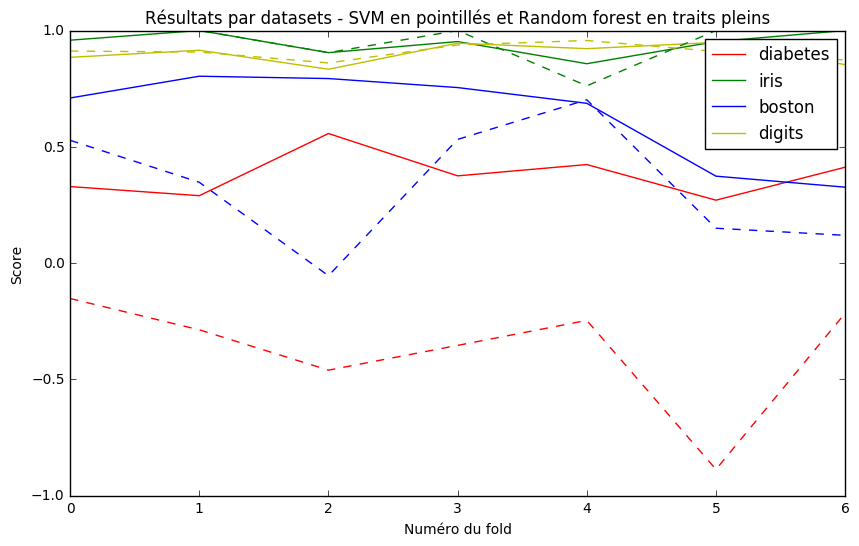

In [218]:
# Affichage du résultat

plt.figure(figsize=(10, 6))
plt.title("Résultats par datasets - SVM en pointillés et Random forest en traits pleins")
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))
plt.xlabel("Numéro du fold")
plt.ylabel("Score")

for key, value in dict_scores_rf.items():    
    plt.plot(np.arange(7), value, '-', label="%s" % key)

for key, value in dict_scores_svm.items():    
    plt.plot(np.arange(7), value, '--')

plt.legend(loc=1, numpoints=1)
plt.show()

On constate donc que les résultats sont plus probants pour les classifieurs que pour le régresseurs, que l'on soit dans le cas des Random Forests ou des SVM

Pour les classifieurs les résultats sont à peu près équivalents entre les SVM et les Random Forests.

Pour les régresseurs les Random Forests fonctionnent mieux que les SVM sur ces datasets

## Question 7

In [282]:
# Parameters
n_estimators = 2
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = datasets.load_iris()
X_unscaled, y = iris.data[:, :2], iris.target

# Standardize
X = preprocessing.scale(X_unscaled)

def compute_contour_rf (n_estimators, indice_subplot):
    # RF fitting
    model = RandomForestClassifier(n_estimators=n_estimators)
    clf = model.fit(X, y)

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

    plt.subplot(indice_subplot)
    plt.title("Nombre d'arbres : %d" % n_estimators)
    
    for tree in model.estimators_:
        Z = tree.predict(np.column_stack((xx.ravel(), yy.ravel())))
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
    plt.axis("tight")

    for i, c in zip(range(3), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i], cmap=plt.cm.Paired)
        plt.legend(scatterpoints=1)

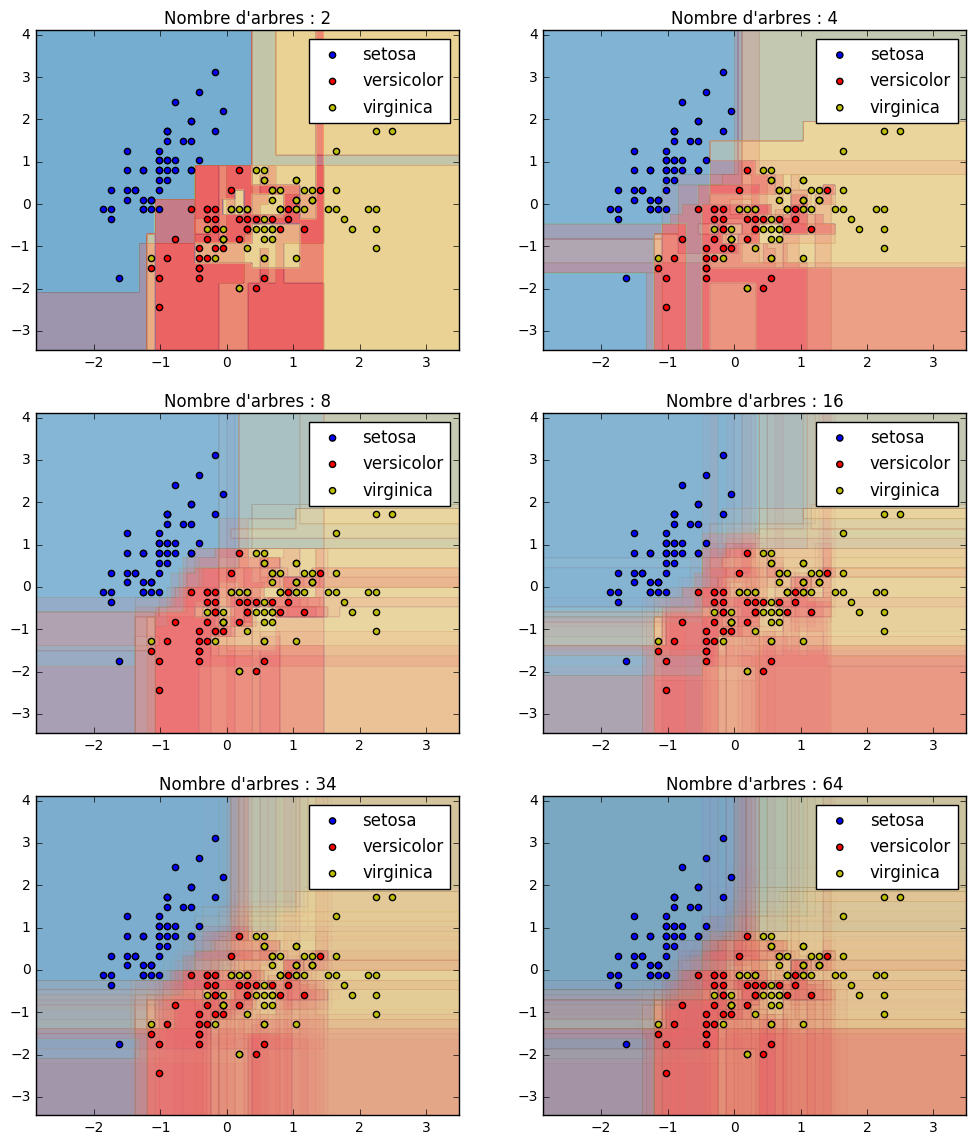

In [288]:
plt.figure(figsize=(12, 14))
compute_contour_rf(2, 321)
compute_contour_rf(4, 322)
compute_contour_rf(8, 323)
compute_contour_rf(16, 324)
compute_contour_rf(34, 325)
compute_contour_rf(64, 326)

plt.show()

## Question 8

In [43]:
# Définition des données
X_iris = dict_datasets["iris"][1][:, 0:2]
y_iris = dict_datasets["iris"][2]

# Défition de la grille du max de profondur
max_depth_list = np.arange(1, 21)
iteration = np.arange(30)

# Définiton des variables stockant les scores
rf_mean_score = np.zeros((len(iteration), len(max_depth_list))) 
dt_mean_score = np.zeros((len(iteration), len(max_depth_list)))

# On réalise plusieurs passes pour mieux estimer l'erreur moyenne entre l'algorithme
# des random forests et des decision trees
for i in iteration:
    for index, max_depth in enumerate(max_depth_list):
        rf_iris = RandomForestClassifier(max_depth=max_depth, n_estimators=100)
        dt_iris = DecisionTreeClassifier(max_depth=max_depth)
        score_rf_iris = cross_val_score(rf_iris, X_iris, y_iris ,cv=6)
        score_dt_iris = cross_val_score(dt_iris, X_iris, y_iris ,cv=6)
        rf_mean_score[i, index] = np.mean(score_rf_iris)
        dt_mean_score[i, index] = np.mean(score_dt_iris)

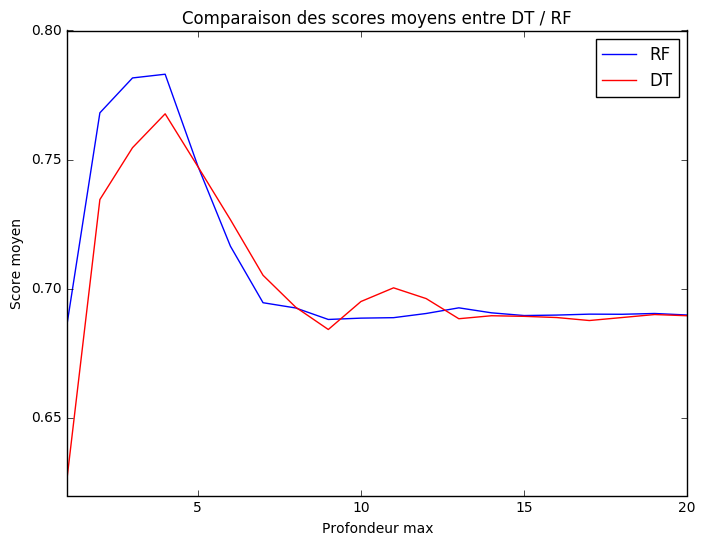

In [44]:
# Affichage du résultat
plt.figure(figsize=(8, 6))
plt.plot(max_depth_list, np.mean(rf_mean_score, axis=0), c="b", label="RF")
plt.plot(max_depth_list, np.mean(dt_mean_score, axis=0), c="r", label="DT")

plt.title("Comparaison des scores moyens entre DT / RF")
plt.xlabel("Profondeur max")
plt.xlim([1, 20])
plt.ylabel("Score moyen")
plt.legend(loc=1, numpoints=1)
plt.show()

Pour meiux estimer l'erreur de l'arbre de décision et celle des forêts aléatoire, on a réalisé 30 cross validation de 6 fold, puis pour chaque profondeur nous avons calculé le résultat moyen.
On constate que pour des faibles profondeurs d'arbres ( < 5 ) les forêts alétoires donnent un meilleur résultat et donc "overfitent" moins les données que l'arbre de décision.

# Boosting
## Question 9

Il suffit de minimiser l'expression suivante $\mathbb{E}(exp(-Yf(x)) \hspace{0.1cm}|\hspace{0.1cm} x)$ d'où :

$$\mathbb{E}(exp(-Yf(x)) \hspace{0.1cm}|\hspace{0.1cm} x) = P(Y = 1 \hspace{0.1cm}| \hspace{0.1cm} x)*e^{-f(x)} + P(Y = -1 \hspace{0.1cm} | \hspace{0.1cm} x)*e^{f(x)}$$

$$\Rightarrow \mathbb{E}(exp(-Yf(x)) \hspace{0.1cm}|\hspace{0.1cm} x) = \eta (x)*e^{-f(x)} + (1 - \eta (x))*e^{f(x)}$$

Si l'on dérive cette quantité en f pour trouver la fonction qui annule cette dérivée on trouve l'équation suivante :

$$-\eta (x)*e^{-f(x)} + (1 - \eta (x))*e^{f(x)} = 0$$

En passant au logarithme on obtient :

$$ log(1 - \eta(x)) + f(x) = log(\eta(x)) - f(x)$$

d'où,

$$f^{*}(x) = \frac{1}{2}log(\frac{\eta(x)}{1 - \eta(x)})$$

## Question 10

$ \text{Le classifieur de Bayes associé au risque } R_{\varphi _{0}} \text{ classe une observation à la valeur +1 si } \eta (x) > 0.5 $

$ \text{Dans le cas de l'exponentielle on classe une observation à la valeur +1 si } sign(\hat{f}(x)) > 0\text{ i.e.}$

$$\frac{1}{2}log(\frac{\eta(x)}{1 - \eta(x)})>0$$

$$\Rightarrow \frac{\eta(x)}{1 - \eta(x)}>1$$

$$\Rightarrow \eta (x) > 0.5$$

On obtient donc bien le même résultat que précédemment


## Question 11

$\mathbb{E}_{w^{m-1}}\left [ exp(-c.Y.\hat{h}_{m}(X)\right ] = \mathbb{P}_{w^{m-1}}(Y=\hat{h}_{m}(X)) * exp(-c) + \mathbb{P}_{w^{m-1}}(Y\neq\hat{h}_{m}(X)) * exp(c) $

On dérive par rapport à "c" et on cherche le c qui annule cette dérivée, ce qui donne :

$$-\mathbb{P}_{w^{m-1}}(Y=\hat{h}_{m}(X)) * exp(-c) + \mathbb{P}_{w^{m-1}}(Y\neq\hat{h}_{m}(X)) * exp(c) = 0 $$

$$\Rightarrow exp(2c) = \frac{\mathbb{P}_{w^{m-1}}(Y=\hat{h}_{m}(X))}{\mathbb{P}_{w^{m-1}}(Y\neq\hat{h}_{m}(X))}$$

d'où par passage au logarithme :

$$ c_{m} = \frac{1}{2}log\left [\frac{\mathbb{P}_{w^{m-1}}(Y=\hat{h}_{m}(X))}{\mathbb{P}_{w^{m-1}}(Y\neq\hat{h}_{m}(X))}\right ]$$


## Question 13

In [6]:
# Définition du jeu de données des digits
X_digits = dict_datasets["digits"][1]
y_digits = dict_datasets["digits"][2]

# Grille du paramètre de la profondeur des arbres
max_depth_list = [1, 2, 5, 8, 10]

# Variable dans laquelle on stocke la moyenne des résultats issus de la cross validation
mean_scores_adab = [0] * len(max_depth_list)

# Cacule des résultats de l'adaboost par CV et 
# calcul des moyennes de ces derniers issus par CV
for i, max_depth in enumerate(max_depth_list):
    dt_adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth))
    score_adab = cross_val_score(dt_adab, X_digits, y_digits, cv=6)
    mean_scores_adab[i] = np.mean(score_adab)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


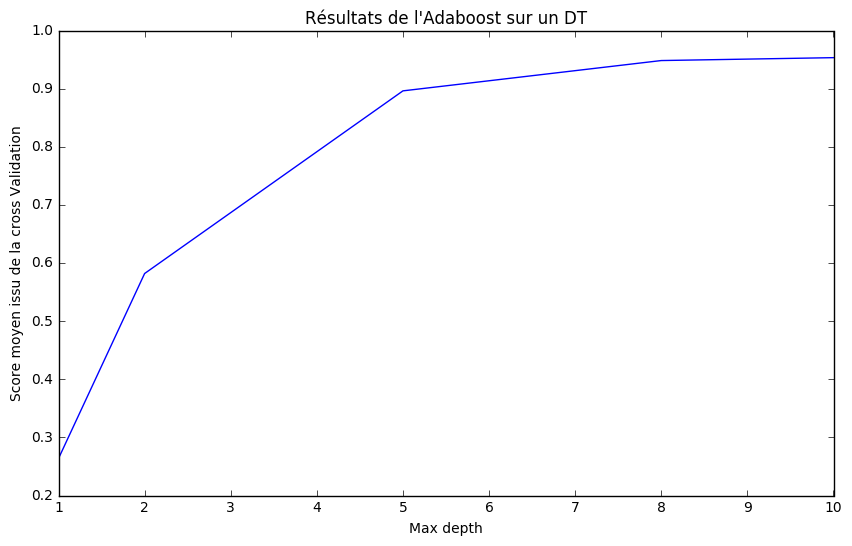

In [4]:
# Affichage du résultat
plt.figure(figsize=(10, 6))
plt.title("Résultats de l'Adaboost sur un DT")
plt.xlabel("Max depth")
plt.ylabel("Score moyen issu de la cross Validation")

plt.plot(max_depth_list, mean_scores_adab, '-')
plt.legend(loc=1, numpoints=1)
plt.show()

## Question 14

In [7]:
# Définition des données de train
X_digits_train = np.concatenate((X_digits[0::4, :], X_digits[1::4, :],  X_digits[2::4, :]), axis=0)
y_digits_train = np.concatenate((y_digits[0::4], y_digits[1::4],  y_digits[2::4]), axis=0)

# Définition des données de test
X_digits_test = X_digits[3::4]
y_digits_test = y_digits[3::4]

n_estimators = 100

def compute_adaboost_for_dt(n_estimators=100, max_depth=5):
    
    # Variable stockant les résultats pour chaque itération
    result_train_per_iter = [0] * n_estimators
    result_test_per_iter = [0] * n_estimators

    # Défition du classifieur
    ada_class = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth), n_estimators=n_estimators)
    ada_class.fit(X_digits_train, y_digits_train)

    # Calcule à chaque étape des résultats pour le train et le test
    error_train = 1 - np.asarray(list(ada_class.staged_score(X_digits_train, y_digits_train)))
    error_test = 1 - np.asarray(list(ada_class.staged_score(X_digits_test, y_digits_test)))
    
    return error_train, error_test

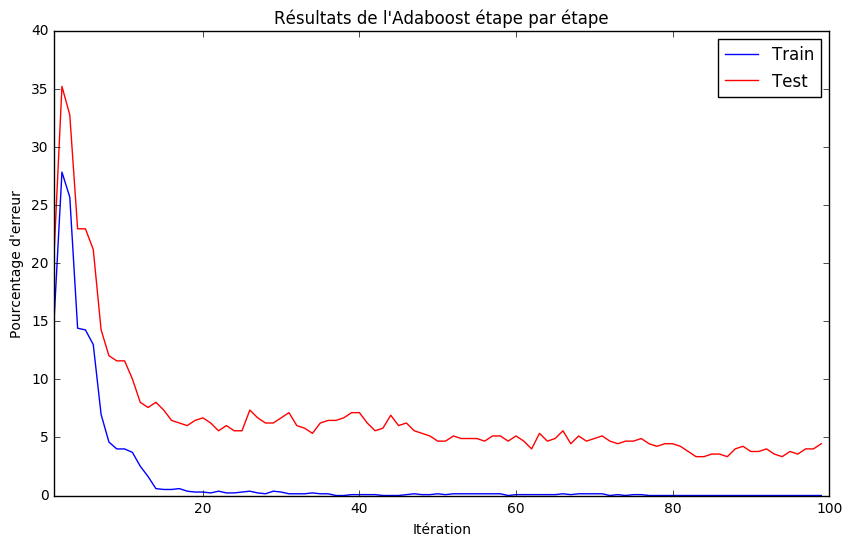

In [10]:
error_train, error_test = compute_adaboost_for_dt()

# Affichage du résultat
plt.figure(figsize=(10, 6))
plt.plot(np.arange(n_estimators), 100 * error_train, label = "Train", c="b")
plt.plot(np.arange(n_estimators), 100 * error_test, label = "Test", c="r")
plt.title("Résultats de l'Adaboost étape par étape")
plt.xlabel("Itération")
plt.xlim([1, 100])
plt.ylabel("Pourcentage d'erreur")
plt.legend(loc=1, numpoints=1)
plt.show()

## Question 15

Sur le schéma précédent, on constate qu'au fur est à mesure des itérations l'erreur diminue. Dans ce cas, à partir d'une quarantaine d'itération l'erreur reste à peu près constante, les itérations suivantes n'ont donc plus d'effet sur l'efficacité de l'algorithme.

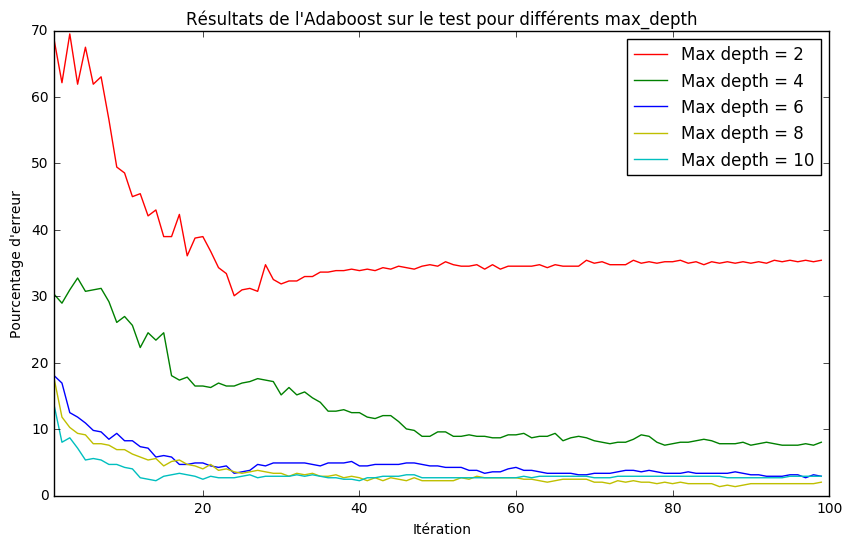

In [13]:
max_depth_list = [2, 4, 6, 8, 10]

plt.figure(figsize=(10, 6))
plt.title("Résultats de l'Adaboost sur le test pour différents max_depth")
plt.xlabel("Itération")
plt.xlim([1, 100])
plt.ylabel("Pourcentage d'erreur")
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y', 'c'])))

for max_depth in max_depth_list:
    error_train, error_test = compute_adaboost_for_dt(n_estimators=100, max_depth=max_depth)
    plt.plot(np.arange(100), 100*error_test, label="Max depth = %d" % max_depth)

plt.legend(loc=1, numpoints=1)
plt.show()


On constate donc que l'erreur diminue avec la profondeur maximale des arbres.

A partir d'une certaine profondeur les résultats renvoyés par la méthode "staged_score" ne correspondent plus au nombre d'estimateurs définis dans le classifieur. Cela doit venir du fait que l'arbre étant de lui-même suffisamment bon sur les données de train, l'adaboost n'a alors plus besoin de réitérer car toutes les données sont déjà correctement bien classées.

In [40]:
# Calcul des erreurs commises pour des arbres profonds 
# et du nombre di'térations avant que le boosting ne s'arrête

max_depth_list = np.arange(10, 21)
nb_stages = np.zeros(len(max_depth_list))
list_error_train = np.zeros(len(max_depth_list))
list_error_test = np.zeros(len(max_depth_list))

for i, max_depth in enumerate(max_depth_list):
    error_train, error_test = compute_adaboost_for_dt(n_estimators=100, max_depth=max_depth)
    nb_stages[i] = len(error_test)
    list_error_train[i] = error_train[-1]
    list_error_test[i] = error_test[-1]

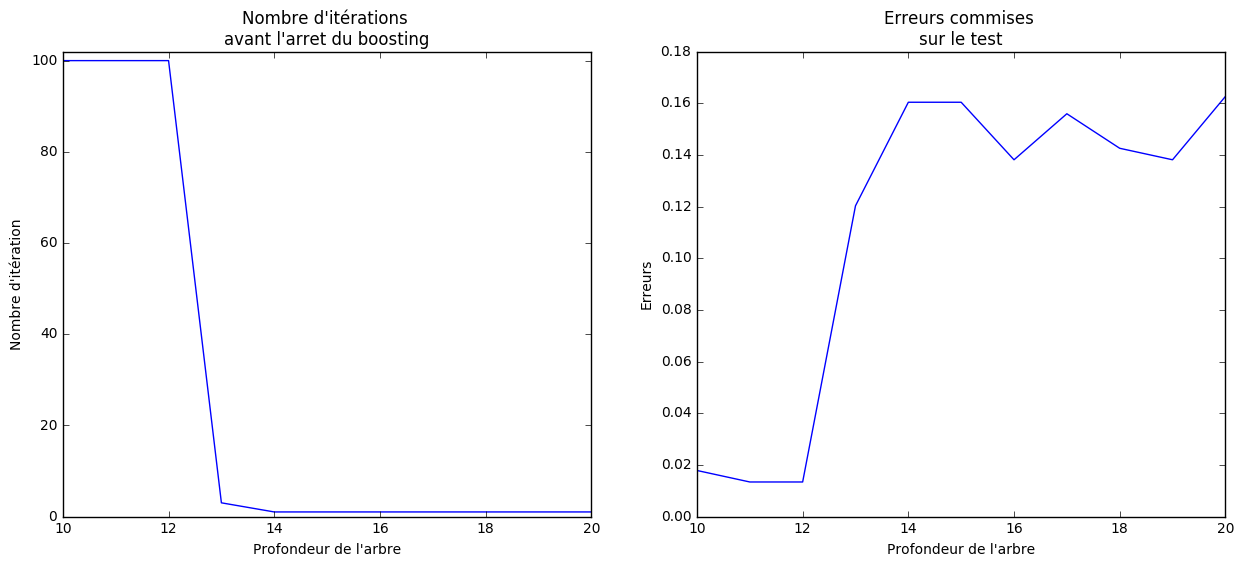

In [41]:
# Affichage des résultats
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(max_depth_list, nb_stages)
plt.title("Nombre d'itérations \navant l'arret du boosting")
plt.xlabel("Profondeur de l'arbre")
plt.ylabel("Nombre d'itération")
plt.ylim([0, 102])

plt.subplot(122)
plt.plot(max_depth_list, list_error_test)
plt.title("Erreurs commises \nsur le test")
plt.xlabel("Profondeur de l'arbre")
plt.ylabel("Erreurs")

plt.show()

On constate donc que jusqu'à une profondeur de 12 tout se passe normalement, le boosting fonctionne et permet d'avoir une erreur faible. A partir d'une profondeur de 13, l'arbre étant "suffisamment efficace" le boosting ne fait plus effet et s'arrête très vite. L'erreur sur le test augmente alors car l'arbre seul sans boosting a tendance à overfitter les données de train  